In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

First, get the summary file for ASPCAP. It can be downloaded from 
https://data.sdss5.org/sas/ipl-2/spectro/astra/0.3.0/v6_0_9-1.0/summary/allStar-ASPCAP-0.3.0-v6_0_9-1.0.fits

HDU 3 contains the parameters from APOGEE north spectra.

In [3]:
fname = '/uufs/chpc.utah.edu/common/home/sdss/ipl-2/spectro/astra/0.3.0/v6_0_9-1.0/summary/allStar-ASPCAP-0.3.0-v6_0_9-1.0.fits'
allStarASPCAP = Table.read(fname, hdu=3)
allStarASPCAP

ASTRA_VERSION,CAT_ID,CAT_ID05,CAT_ID10,TIC_V8_ID,GAIA_DR3_SOURCE_ID,SDSS4_DR17_APOGEE_ID,SDSS4_DR17_FIELD,SDSS4_APOGEE_TARGET1,SDSS4_APOGEE_TARGET2,SDSS4_APOGEE2_TARGET1,SDSS4_APOGEE2_TARGET2,SDSS4_APOGEE2_TARGET3,HEALPIX,RA,DEC,GAIA_RA,GAIA_DEC,PLX,PMRA,PMDE,E_PMRA,E_PMDE,GAIA_V_RAD,GAIA_E_V_RAD,G_MAG,BP_MAG,RP_MAG,J_MAG,H_MAG,K_MAG,E_J_MAG,E_H_MAG,E_K_MAG,CARTON_0,V_XMATCH,DOPPLER_TEFF,DOPPLER_E_TEFF,DOPPLER_LOGG,DOPPLER_E_LOGG,DOPPLER_FE_H,DOPPLER_E_FE_H,DOPPLER_STARFLAG,DOPPLER_VERSION,DOPPLER_V_RAD,DOPPLER_V_SCATTER,DOPPLER_V_ERR,DOPPLER_N_GOOD_VISITS,DOPPLER_N_GOOD_RVS,DOPPLER_CHI_SQ,DOPPLER_CCPFWHM,DOPPLER_AUTOFWHM,DOPPLER_N_COMPONENTS,TASK,DATA_PRODUCT,TEFF,E_TEFF,BITMASK_TEFF,LOGG,E_LOGG,BITMASK_LOGG,M_H,E_M_H,BITMASK_M_H,V_SINI,E_V_SINI,BITMASK_V_SINI,V_MICRO,E_V_MICRO,BITMASK_V_MICRO,C_M_ATM,E_C_M_ATM,BITMASK_C_M_ATM,N_M_ATM,E_N_M_ATM,BITMASK_N_M_ATM,ALPHA_M_ATM,E_ALPHA_M_ATM,BITMASK_ALPHA_M_ATM,AL_H,E_AL_H,BITMASK_AL_H,CHISQ_AL_H,C13_H,E_C13_H,BITMASK_C13_H,CHISQ_C13_H,CA_H,E_CA_H,BITMASK_CA_H,CHISQ_CA_H,CE_H,E_CE_H,BITMASK_CE_H,CHISQ_CE_H,C1_H,E_C1_H,BITMASK_C1_H,CHISQ_C1_H,C_H,E_C_H,BITMASK_C_H,CHISQ_C_H,CO_H,E_CO_H,BITMASK_CO_H,CHISQ_CO_H,CR_H,E_CR_H,BITMASK_CR_H,CHISQ_CR_H,CU_H,E_CU_H,BITMASK_CU_H,CHISQ_CU_H,FE_H,E_FE_H,BITMASK_FE_H,CHISQ_FE_H,K_H,E_K_H,BITMASK_K_H,CHISQ_K_H,MG_H,E_MG_H,BITMASK_MG_H,CHISQ_MG_H,MN_H,E_MN_H,BITMASK_MN_H,CHISQ_MN_H,NA_H,E_NA_H,BITMASK_NA_H,CHISQ_NA_H,ND_H,E_ND_H,BITMASK_ND_H,CHISQ_ND_H,NI_H,E_NI_H,BITMASK_NI_H,CHISQ_NI_H,N_H,E_N_H,BITMASK_N_H,CHISQ_N_H,O_H,E_O_H,BITMASK_O_H,CHISQ_O_H,P_H,E_P_H,BITMASK_P_H,CHISQ_P_H,SI_H,E_SI_H,BITMASK_SI_H,CHISQ_SI_H,S_H,E_S_H,BITMASK_S_H,CHISQ_S_H,TI_H,E_TI_H,BITMASK_TI_H,CHISQ_TI_H,TI2_H,E_TI2_H,BITMASK_TI2_H,CHISQ_TI2_H,V_H,E_V_H,BITMASK_V_H,CHISQ_V_H,SNR,CHISQ,BITMASK_ASPCAP,WARNFLAG,BADFLAG
bytes5,int64,int64,int64,int64,int64,bytes19,bytes19,int32,int32,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes30,bytes2,float32,float32,float32,float32,float32,float32,int32,bytes7,float32,float32,float32,int32,int32,float32,float32,float32,int32,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool
0.3.0,790462335,-1,-1,461633358,573292926162402816,2M01145593+8426391,N188,-2147481600,0,0,0,0,483,18.733028,84.44422,18.733028,84.44422,1.736325,4.557602,-7.104787,0.013286964,0.0137344375,-12.550594,2.4388747,13.428001,13.846593,12.840049,12.178,11.892,11.783,0.023,0.028,0.022,--,v0,6111.6,14.5,4.576,0.013,-0.277,0.008,0,SDSS-IV,-26.468391,--,--,-1,-1,--,--,--,-1,67722566,1879461,6189.7,170.53,0.0,4.4952,0.14,0.0,0.099741,0.030136,0.0,5.4887066,1.1736603,0.0,1.1959858,0.63638926,0.0,-0.025921,0.10042,0.0,0.46069,0.2392,0.0,-0.04558,0.036905,0.0,0.042712,0.015447,0.0,1.511402,0.138759,0.033894878,0.0,0.045498807,0.139719,0.040045734,0.0,0.05128614,0.187945,0.033717703,0.0,0.053456437,0.052376,0.078192644,0.0,0.24376985,0.072508,0.07688521,0.0,0.13957576,0.61856,0.01246,0.0,0.1783323,-0

Because astraStarASPCAP files weren't created for IPL-2, we can't get the best-fit model. But we can look at the stacked spectra.  For that, we only need to catalog ID.

In [4]:
single_star = allStarASPCAP[1]
cat_id = str(single_star["CAT_ID"])

In [5]:
mwmStar_filename = f"mwmStar-0.3.0-{cat_id}.fits"
mwStar_filename_full = f"/uufs/chpc.utah.edu/common/home/sdss/ipl-2/spectro/astra/0.3.0/v6_0_9-1.0/spectra/star/{cat_id[-4:-2]}/{cat_id[-2:]}/" + mwmStar_filename

Now, load the data and model spectrum and make plots.

In [7]:
# again HDU 3 contains the data from APO
mwmStar = Table.read(mwStar_filename_full, hdu=3)
# We want the first entry in each of these columns. They are stored this way to be as 
# similar as possible to mwmVisit files, which contain separate spectra for each visit.
obs_wl = mwmStar["LAMBDA"][0]
obs_flux = mwmStar["FLUX"][0]
obs_err = mwmStar["E_FLUX"][0]

In [8]:
single_star["SNR"]

301.85083

Text(0, 0.5, 'flux')

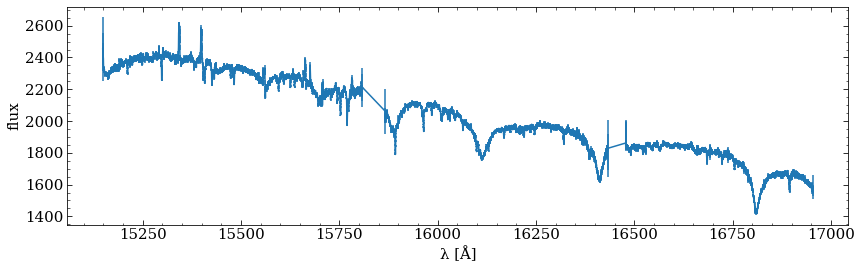

In [9]:
plt.figure(figsize=(14,4))

mask = obs_err < 0.1 * obs_flux

plt.errorbar(obs_wl[mask], obs_flux[mask], yerr=obs_err[mask])
plt.xlabel("λ [Å]")
plt.ylabel("flux")